# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,TX001046,AC00474,230.08,2023-05-01 16:23:40,Debit,Austin,D000045,93.52.44.101,M006,Online,79.0,Retired,124.0,1.0,4466.10,2024-11-04 08:11:47
2533,TX001484,AC00198,561.58,2023-06-23 17:38:26,Debit,Sacramento,D000229,170.154.69.105,M022,Online,65.0,Doctor,23.0,1.0,11748.86,2024-11-04 08:06:32
2534,TX000200,AC00358,493.11,2023-07-31 16:25:26,Debit,Colorado Springs,D000232,35.220.238.127,M022,Branch,53.0,Retired,236.0,1.0,7432.99,2024-11-04 08:08:01
2535,TX000592,AC00057,198.62,2023-05-15 16:19:14,Credit,Tucson,D000378,97.4.209.133,M079,Branch,27.0,Student,84.0,1.0,1196.07,2024-11-04 08:06:38


In [4]:
# Tampilkan 10 baris pertama dengan function head.
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [5]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

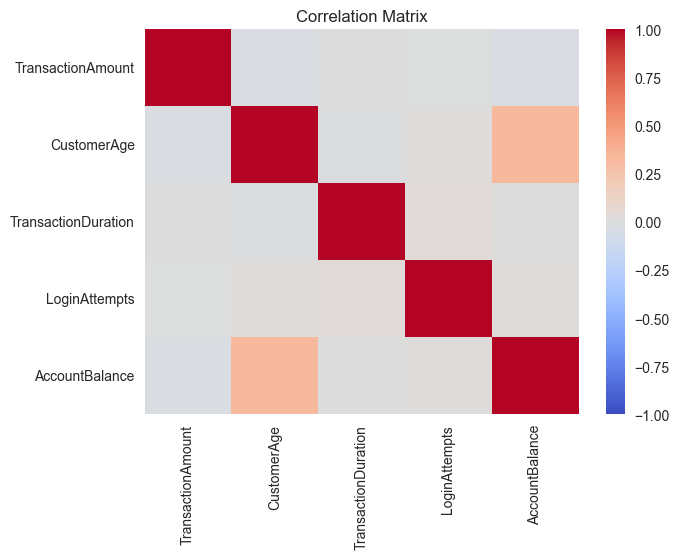

In [7]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(7,5))
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

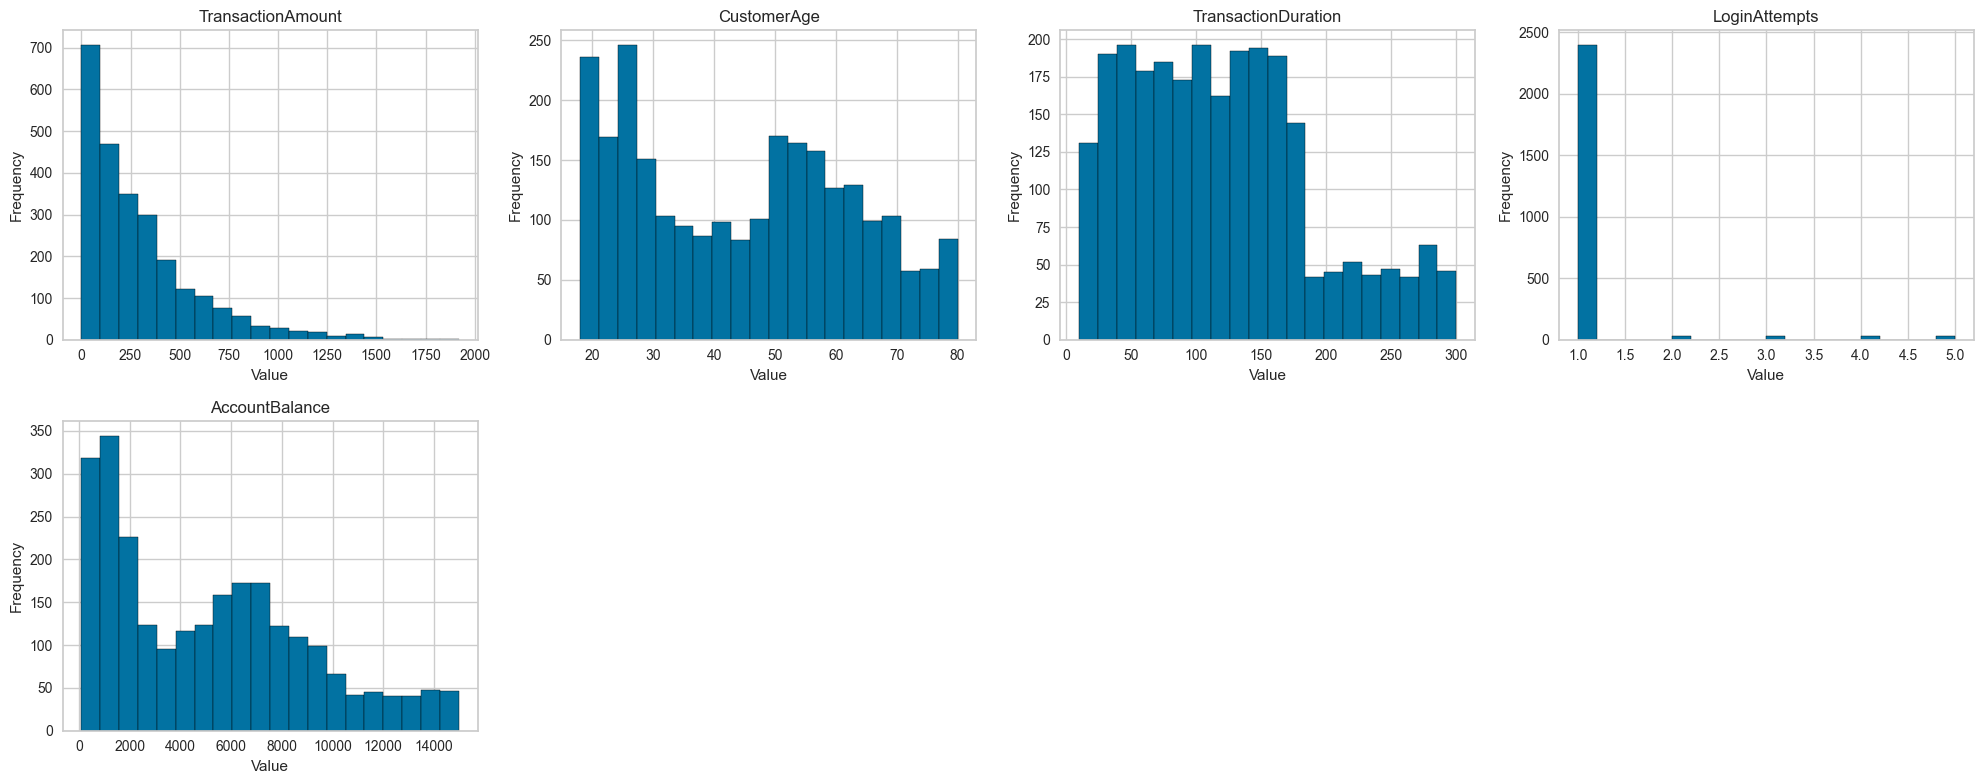

In [8]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_features = df.select_dtypes(include=['number']).columns

num_vars = len(numeric_features)

n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

i = 0
for i, column in enumerate(numeric_features):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

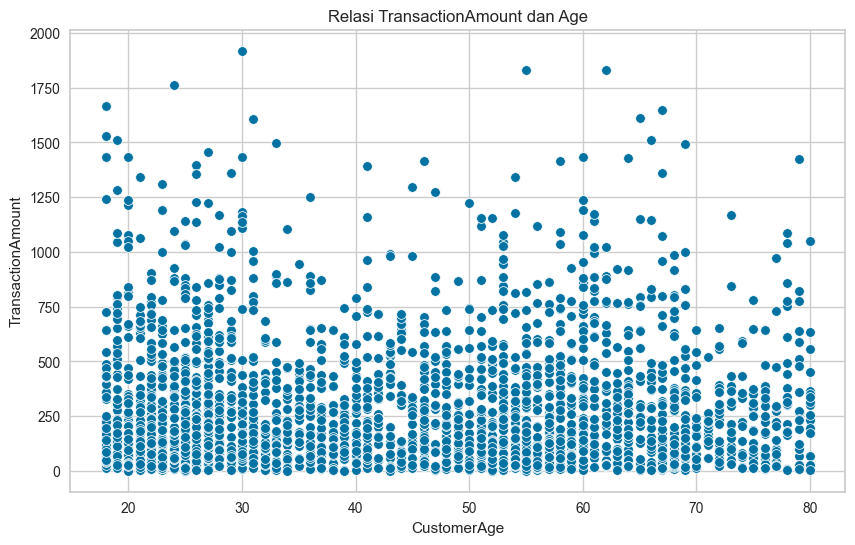

In [9]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

plt.figure(figsize=(10, 6))
sns.scatterplot(y='TransactionAmount', x='CustomerAge', data=df)
plt.title("Relasi TransactionAmount dan Age")
plt.xlabel("CustomerAge")
plt.ylabel("TransactionAmount")
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [10]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [11]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [12]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numeric_features = [col for col in df.select_dtypes(include=['number']).columns if col != 'CustomerAge']
#exclude 'CustomerAge' for binning
numeric_features_scale = [col + 'Scale' for col in numeric_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_features])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)
df[numeric_features] = scaled_df
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [13]:
# Melakukan drop pada kolom yang memiliki keterangan id
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [14]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
categorical_cols = [('TransactionType', 'TransactionTypeEncoded'), ('Location', 'LocationEncoded'), ('Channel', 'ChannelEncoded'), ('CustomerOccupation', 'CustomerOccupationEncoded')]
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col[1]] = encoder.fit_transform(df[col[0]])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionTypeEncoded,LocationEncoded,ChannelEncoded,CustomerOccupationEncoded
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,1,36,0,0
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,15,0,0
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,1,23,2,3
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,1,33,2,3
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39,0,1,2,3


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.dropna(inplace=True)
df.isnull().sum()

TransactionAmount            0
TransactionDate              0
TransactionType              0
Location                     0
Channel                      0
CustomerAge                  0
CustomerOccupation           0
TransactionDuration          0
LoginAttempts                0
AccountBalance               0
PreviousTransactionDate      0
TransactionTypeEncoded       0
LocationEncoded              0
ChannelEncoded               0
CustomerOccupationEncoded    0
dtype: int64

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

filtered_features = [ feature for feature in numeric_features if feature not in ['TransactionAmount', 'AccountBalance', 'CustomerAge']]

Q1 = df[filtered_features].quantile(0.25)
Q3 = df[filtered_features].quantile(0.75)
IQR = Q3 - Q1

mask = ~((df[filtered_features] < (Q1 - 1.5 * IQR)) |
         (df[filtered_features] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[mask]

df

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionTypeEncoded,LocationEncoded,ChannelEncoded,CustomerOccupationEncoded
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,1,36,0,0
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,15,0,0
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,1,23,2,3
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,1,33,2,3
5,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,1,28,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.382263,2023-02-24 16:24:46,Debit,Denver,Online,23.0,Student,-1.433292,-0.204629,-0.856135,2024-11-04 08:12:22,1,10,2,3
2511,-0.186796,2023-02-14 16:21:23,Credit,Jacksonville,Online,24.0,Student,-0.377123,-0.204629,-1.278402,2024-11-04 08:07:49,0,17,2,3
2523,-0.977083,2023-04-20 18:50:39,Debit,New York,Branch,76.0,Retired,-0.605484,-0.204629,-0.052396,2024-11-04 08:07:37,1,27,1,2
2524,-0.224308,2023-12-28 17:31:03,Debit,Omaha,ATM,37.0,Engineer,-0.976570,-0.204629,0.404504,2024-11-04 08:09:17,1,29,0,1


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
bins = [0, 20, 30, 40, 50, 60, 999]
labels = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']
age_encoder = LabelEncoder()
df['CustomerAgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)
df['CustomerAgeGroupEncoded'] = age_encoder.fit_transform(df['CustomerAgeGroup'])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionTypeEncoded,LocationEncoded,ChannelEncoded,CustomerOccupationEncoded,CustomerAgeGroup,CustomerAgeGroupEncoded
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,1,36,0,0,60+,4
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,15,0,0,60+,4
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,1,23,2,3,<20,5
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,1,33,2,3,21–30,0
5,-0.703375,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,1,28,0,3,<20,5


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionTypeEncoded,LocationEncoded,ChannelEncoded,CustomerOccupationEncoded,CustomerAgeGroupEncoded
count,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.00000,2135.000000,2135.000000
mean,0.000498,44.553162,-0.002741,-0.204629,-0.009752,0.774707,21.270258,0.98548,1.517096,2.211241
std,1.004328,17.808595,1.009635,0.000000,0.998366,0.417873,12.314739,0.80432,1.135424,1.671994
min,-1.017881,18.000000,-1.561745,-0.204629,-1.285856,0.000000,0.000000,0.00000,0.000000,0.000000
25%,-0.741092,27.000000,-0.805299,-0.204629,-0.930600,1.000000,11.000000,0.00000,0.000000,0.000000
50%,-0.294198,45.000000,-0.120217,-0.204629,-0.120406,1.000000,21.000000,1.00000,2.000000,2.000000
75%,0.402087,59.000000,0.593411,-0.204629,0.648664,1.000000,32.000000,2.00000,3.000000,4.000000
max,5.549651,80.000000,2.577295,-0.204629,2.531190,1.000000,42.000000,2.00000,3.000000,5.000000


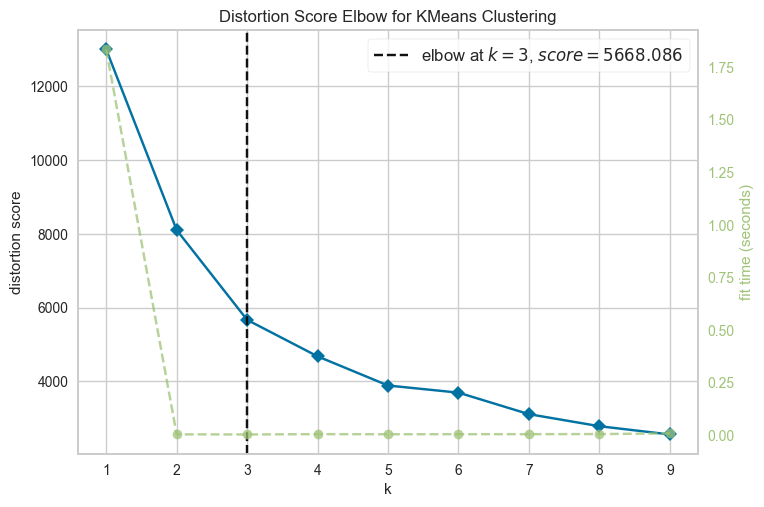

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# included_features = numeric_features_scale + [ col[1] for col in categorical_cols ] + ['CustomerAgeGroupEncoded']
included_features = ["TransactionAmount", "AccountBalance", "CustomerOccupationEncoded","CustomerAgeGroupEncoded"]
df_proc = df[included_features]

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_proc)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_proc)
kmeans.fit(df_proc)

KMeans(n_clusters=3, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmeans.labels_
score = silhouette_score(df_proc, labels)
score

np.float64(0.3756334877635042)

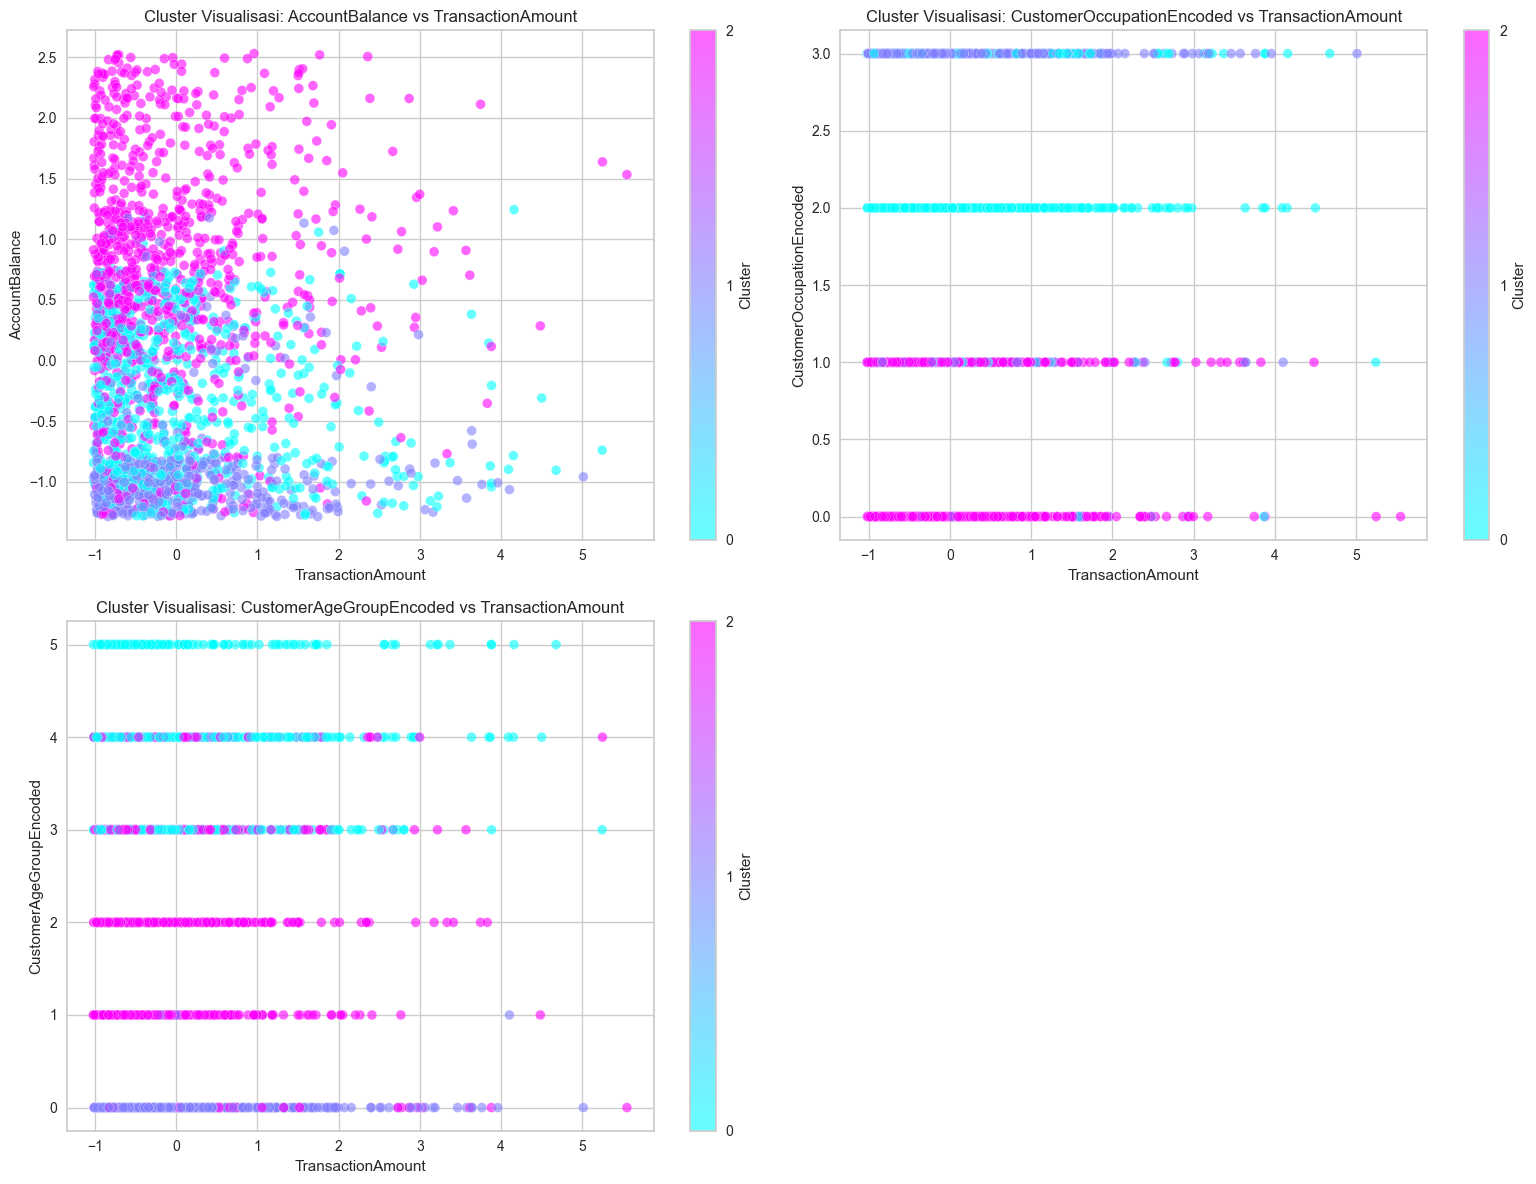

In [24]:
# Membuat visualisasi hasil clustering
centroids = kmeans.cluster_centers_

x_index = included_features.index('TransactionAmount')
y_index = included_features.index('CustomerAgeGroupEncoded')

plt.figure(figsize=(16, 12))

for i, feature in enumerate(included_features):
    if feature == 'TransactionAmount':
        continue
    plt.subplot(2, 2, i)
    plt.scatter(df_proc['TransactionAmount'], df_proc[feature],
                c=labels, cmap='cool', s=50, alpha=0.6, edgecolors='w')
    plt.title(f'Cluster Visualisasi: {feature} vs TransactionAmount')
    plt.xlabel('TransactionAmount')
    plt.ylabel(feature)
    cbar = plt.colorbar(label='Cluster')
    cbar.set_ticks(range(3))

plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=3)
x_pca = pca.fit_transform(df_proc)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
res = df.groupby('Cluster').agg({
    'TransactionAmount': ['min', 'max', 'mean'],
    'AccountBalance': ['min', 'max', 'mean'],
    'CustomerOccupation': lambda x: x.mode().iloc[0],
    'CustomerAgeGroup': lambda x: x.mode().iloc[0],
})
print(res)

        TransactionAmount                     AccountBalance            \
                      min       max      mean            min       max   
Cluster                                                                  
0               -1.017881  5.244659  0.045752      -1.280458  1.244471   
1               -1.015827  5.012878  0.044137      -1.285856  1.177118   
2               -1.017676  5.549651 -0.057059      -1.281061  2.531190   

                  CustomerOccupation CustomerAgeGroup  
             mean           <lambda>         <lambda>  
Cluster                                                
0       -0.353786            Retired              60+  
1       -0.862087            Student            21–30  
2        0.703738             Doctor            41–50  


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Usia Paruh Baya, Pensiunan, Saldo Sedang )**:
  - **Rata-rata (mean) TransactionAmount:** 0.045752
  - **Rata-rata (mean) AccountBalance:** -0.353786
  - **Modus CustomerOccupation:** Retired
  - **Modus CustomerAgeGroup:** 60+
  - **Analisis:** Klaster ini didominasi dengan pelanggan diatas usia 60 dan berprofesi sebagai pensiunan. Rata-rata jumlah transaksi merupakan tertinggi menunjukan aktivitas perbankan yang tinggi, sedangkan rata-rata saldo berada di tingkat sedang. Tingginya frekuensi transaksi dapat mencerminkan gaya hidup yang lebih stabil dan bebas, mengingat mereka umumnya tidak lagi memiliki tanggungan jangka panjang, seperti biaya pendidikan anak atau cicilan besar.

2. **Cluster 1: (Nasabah Usia Produktif, Saldo terendah, Transaksi tinggi )**:
  - **Rata-rata (mean) TransactionAmount:** 0.044137
  - **Rata-rata (mean) AccountBalance:** -0.862087
  - **Modus CustomerOccupation:** Student
  - **Modus CustomerAgeGroup:** 21-30
  - **Analisis:** Klaster didominasi oleh usia 21-30 dan rata-rata adalah pelajar. Mereka menunjukan transaksi cukup tinggi, mendekati klaster 0. Namun, rata-rata saldo mereka adalah yang terendah. Hal ini dapat mencerminkan perilaku keuangan yang aktif meskipun dengan keterbatasan dana, kemungkinan karena belum memiliki penghasilan tetap atau kondisi keuangan yang belum stabil.
3. **Cluster 2: (Nasabah Usia Matang, Saldo tinggi, Transaksi terendah )**:
  - **Rata-rata (mean) TransactionAmount:** -0.057059
  - **Rata-rata (mean) AccountBalance:** 0.703738
  - **Modus CustomerOccupation:** Doctor
  - **Modus CustomerAgeGroup:** 41-50
  - **Analisis:** Klaster ini didominasi pelanggan dengan usia 41-50 dan bekerja sebagai dokter. Jumlah transaksi cenderung rendah dibanding klaster lainnya namun memiliki saldo tertinggi. Menunjukan kemapanan dalam keuangan, namun lebih menontrol pengeluaran.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal
df[numeric_features] = scaler.inverse_transform(df[numeric_features])
df

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionTypeEncoded,LocationEncoded,ChannelEncoded,CustomerOccupationEncoded,CustomerAgeGroup,CustomerAgeGroupEncoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1,36,0,0,60+,4,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,15,0,0,60+,4,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1,23,2,3,<20,5,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,1,33,2,3,21–30,0,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,1,28,0,3,<20,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,185.97,2023-02-24 16:24:46,Debit,Denver,Online,23.0,Student,19.0,1.0,1776.91,2024-11-04 08:12:22,1,10,2,3,21–30,0,1
2511,243.08,2023-02-14 16:21:23,Credit,Jacksonville,Online,24.0,Student,93.0,1.0,131.25,2024-11-04 08:07:49,0,17,2,3,21–30,0,1
2523,12.18,2023-04-20 18:50:39,Debit,New York,Branch,76.0,Retired,77.0,1.0,4909.24,2024-11-04 08:07:37,1,27,1,2,60+,4,0
2524,232.12,2023-12-28 17:31:03,Debit,Omaha,ATM,37.0,Engineer,51.0,1.0,6689.87,2024-11-04 08:09:17,1,29,0,1,31–40,1,2


In [31]:
res = df.groupby('Target').agg({
    'TransactionAmount': ['min', 'max', 'mean'],
    'AccountBalance': ['min', 'max', 'mean'],
    'CustomerOccupation': lambda x: x.mode().iloc[0],
    'CustomerAgeGroup': lambda x: x.mode().iloc[0],
})
print(res)

       TransactionAmount                      AccountBalance            \
                     min      max        mean            min       max   
Target                                                                   
0                   0.26  1830.00  311.024062         123.24   9963.39   
1                   0.86  1762.28  310.552065         102.20   9700.90   
2                   0.32  1919.11  280.985365         120.89  14977.99   

                    CustomerOccupation CustomerAgeGroup  
               mean           <lambda>         <lambda>  
Target                                                   
0       3734.663681            Retired              60+  
1       1753.714393            Student            21–30  
2       7856.047167             Doctor            41–50  


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Usia Paruh Baya, Pensiunan, Saldo Sedang )**:
  - **Rata-rata (mean) TransactionAmount:** 311.024 Min: 0.26 Max: 1830.00
  - **Rata-rata (mean) AccountBalance:** 3734.66 Min: 10.20 Max: 9700.90
  - **Modus CustomerOccupation:** Retired
  - **Modus CustomerAgeGroup:** 60+
  - **Analisis:** Klaster ini didominasi oleh nasabah usia 60+ dengan profesi pensiunan. Mereka memiliki jumlah transaksi tertinggi, menunjukkan aktivitas finansial yang aktif, sementara saldo rata-rata berada di tingkat sedang. Hal ini mencerminkan sebagian dari mereka sudah mapan. Sehingga, rekomendasi produk untuk klaster ini adalah asuransi kesehatan, dana pensiun.


2. **Cluster 1: (Nasabah Usia Produktif, Saldo terendah, Transaksi tinggi )**:
  - **Rata-rata (mean) TransactionAmount:** 310.552065  Min: 0.86  Max:1762.28
  - **Rata-rata (mean) AccountBalance:** 1753.714393 Min: 102.20 Max: 9700.90
  - **Modus CustomerOccupation:** Student
  - **Modus CustomerAgeGroup:** 21-30
  - **Analisis:** Klaster ini didominasi oleh pelajar berusia 21–30 tahun. Mereka aktif bertransaksi meskipun memiliki saldo rata-rata terendah, mencerminkan gaya hidup dinamis dengan keterbatasan dana karena belum memiliki penghasilan tetap. Rekomendasi produk untuk klaster ini adalah produk kartu kredit disertai cashback, investasi jangka pendek, atau produk pinjaman untuk dana pendidikan.

3. **Cluster 2: (Nasabah Usia Matang, Saldo tinggi, Transaksi terendah )**:
  - **Rata-rata (mean) TransactionAmount:** 0.32  Min: 1919.11  Max: 280.985365
  - **Rata-rata (mean) AccountBalance:** 7856.047167 Min: 120.89  Max:14977.99
  - **Modus CustomerOccupation:** Doctor
  - **Modus CustomerAgeGroup:** 41-50
  - **Analisis:** Klaster ini terdiri dari nasabah usia 41–50, mayoritas berprofesi sebagai dokter. Mereka memiliki saldo rata-rata tertinggi namun frekuensi transaksi paling rendah, mencerminkan kondisi finansial yang stabil dengan pola pengeluaran yang lebih terkontrol. Rekomendasi produk untuk klaster ini adalah produk investasi(saham, desposito atau reksa dana), kartu kredit berlimit tinggi atau asuransi keluarga.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [32]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Sudah terintegrasi diatas.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionTypeEncoded,LocationEncoded,ChannelEncoded,CustomerOccupationEncoded,CustomerAgeGroup,CustomerAgeGroupEncoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1,36,0,0,60+,4,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,15,0,0,60+,4,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1,23,2,3,<20,5,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,1,33,2,3,21–30,0,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,1,28,0,3,<20,5,0


In [33]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)